# All filters for Galex, Kids and VISTA

KiDS will survey two areas of extragalactic sky, some 750 square degrees each, in four filters **(u,g,r,i)**. In parallel, the companion VIKING project on the neighbouring VISTA telescope will cover the same area in five near-infrared bands: **Z,Y,J,H,K.**

https://kids.strw.leidenuniv.nl/overview.php


- See for Filters : https://github.com/bd-j/sedpy/blob/main/sedpy/data/filters/README.md



- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- CC: kernel conda_jax0235_py310
- creation date : 2023-11-13
- update : 2023-11-13


| computer | processor | kernel              |    date     |
| --- | --- | --- | --- |
| CC       | CPU       | conda_jax0325_py310 | 2023-11-10  |
| macbookpro | CPU | conda_jaxcpu_dsps_py310 | 2023-11-10  | 


libraries 
=========

- matplotlib
- seaborn
- numpy

jax
---

- jaxlib-0.3.25+cuda11.cudnn82
- jaxopt
- optax
- corner
- arviz
- numpyro

sps
---

- fsps
- prospect
- dsps
- diffstar
- diffmah
- sedpy


(conda_jax0325_py310) 
`/pbs/throng/lsst/users/dagoret/desc/StellarPopulationSynthesis>pip list | grep` 

| lib | version |
|--- | --- | 
|jax  |                         0.4.20 |
|jaxlib |                       0.4.20 |
|jaxopt  |                      0.8.2 |

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx

import numpy as np
#viridis = mpl.colormaps['viridis'].resampled(8)

In [2]:
filters_galex = ["galex_FUV","galex_NUV"]
filters_sdss = ["sdss_u0","sdss_g0","sdss_r0","sdss_i0"]
filters_vircam = ["vista_vircam_Z","vista_vircam_Y","vista_vircam_J","vista_vircam_H","vista_vircam_Ks"]

In [3]:
from sedpy import observate

In [4]:
all_filt_galex = []
for filtname in filters_galex:
    filt = observate.Filter(filtname)
    all_filt_galex.append(filt)   
N_galex = len(all_filt_galex)

In [5]:
N_galex

2

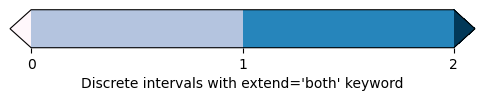

In [6]:
cmap = mpl.cm.PuBu
bounds = range(N_galex+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

cNorm = colors.Normalize(vmin=0, vmax=N_galex)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
all_colors_galex = scalarMap.to_rgba(np.arange(N_galex+1), alpha=1)

In [7]:
all_filt_sdss = []
for filtname in filters_sdss:
    filt = observate.Filter(filtname)
    all_filt_sdss.append(filt)  
N_sdss = len(all_filt_sdss)

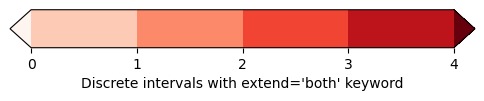

In [8]:
cmap = mpl.cm.Reds
bounds = range(N_sdss+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

cNorm = colors.Normalize(vmin=0, vmax=N_sdss)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
all_colors_sdss = scalarMap.to_rgba(np.arange(N_sdss+1), alpha=1)

In [9]:
all_filt_vircam = []
for filtname in filters_vircam:
    filt = observate.Filter(filtname)
    all_filt_vircam.append(filt) 
N_vircam = len(all_filt_vircam)


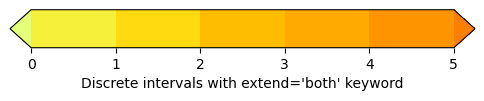

In [10]:
cmap = mpl.cm.Wistia
bounds = range(N_vircam+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")
cNorm = colors.Normalize(vmin=0, vmax=N_vircam)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
all_colors_vircam = scalarMap.to_rgba(np.arange(N_vircam+1), alpha=1)

(0.0, 25000.0)

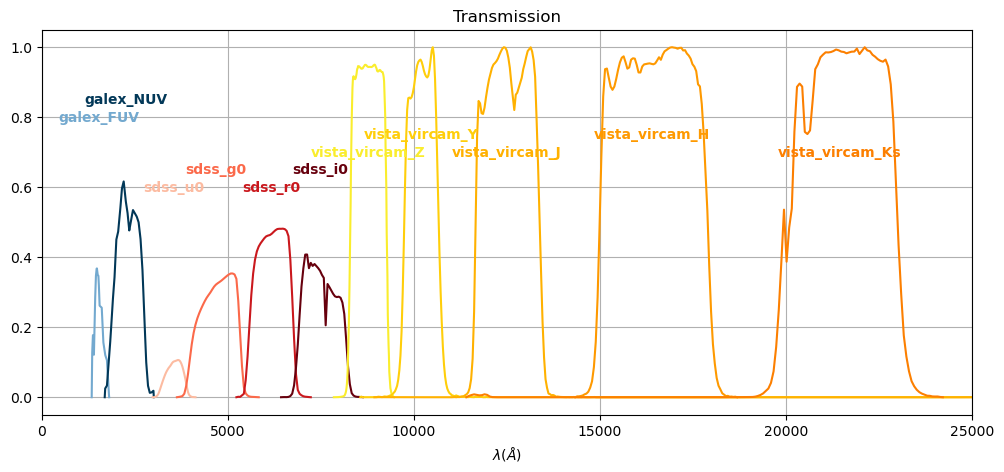

In [21]:
fig,ax = plt.subplots(1,1,figsize=(12,5))

for idx in range(N_galex):
    the_filt = all_filt_galex[idx]
    wlmean = the_filt.wave_mean
    ax.plot(the_filt.wavelength,the_filt.transmission/100.,color=all_colors_galex[idx+1])
    if idx%2 ==0:
        ax.text(wlmean, 0.8, filters_galex[idx],horizontalalignment='center',verticalalignment='center',color=all_colors_galex[idx+1],fontweight="bold") 
    else:
        ax.text(wlmean, 0.85, filters_galex[idx],horizontalalignment='center',verticalalignment='center',color=all_colors_galex[idx+1],fontweight="bold") 
    #transform=ax.transAxes)
    
for idx in range(N_sdss):
    the_filt = all_filt_sdss[idx]
    wlmean = the_filt.wave_mean
    ax.plot(the_filt.wavelength,the_filt.transmission,color=all_colors_sdss[idx+1])  
    if idx%2 ==0:
        ax.text(wlmean, 0.6, filters_sdss[idx],horizontalalignment='center',verticalalignment='center',color=all_colors_sdss[idx+1],fontweight="bold") 
    else:
        ax.text(wlmean, 0.65, filters_sdss[idx],horizontalalignment='center',verticalalignment='center',color=all_colors_sdss[idx+1],fontweight="bold") 

for idx in range(N_vircam):
    the_filt = all_filt_vircam[idx]
    wlmean = the_filt.wave_mean
    if idx==0:
        ax.plot(the_filt.wavelength,the_filt.transmission/100.,color=all_colors_vircam[idx+1])   
    else:
        ax.plot(the_filt.wavelength,the_filt.transmission,color=all_colors_vircam[idx+1]) 

    if idx%2 ==0:
        ax.text(wlmean, 0.7, filters_vircam[idx],horizontalalignment='center',verticalalignment='center',color=all_colors_vircam[idx+1],fontweight="bold") 
    else:
        ax.text(wlmean, 0.75, filters_vircam[idx],horizontalalignment='center',verticalalignment='center',color=all_colors_vircam[idx+1],fontweight="bold") 

ax.grid()
ax.set_title("Transmission")
ax.set_xlabel("$\lambda (\AA)$")
ax.set_xlim(0.,25000.)